In [56]:

import pandas as pd
import numpy as np

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('monthly_totals_2014_2025.csv')
print(df.head())

        ds      y
0  2014-01  47112
1  2014-02  49154
2  2014-03  50537
3  2014-04  50453
4  2014-05  50689


In [58]:
test_size = 12
train_ts = df.iloc[:-test_size]['y']
test_ts = df.iloc[-test_size:]['y']

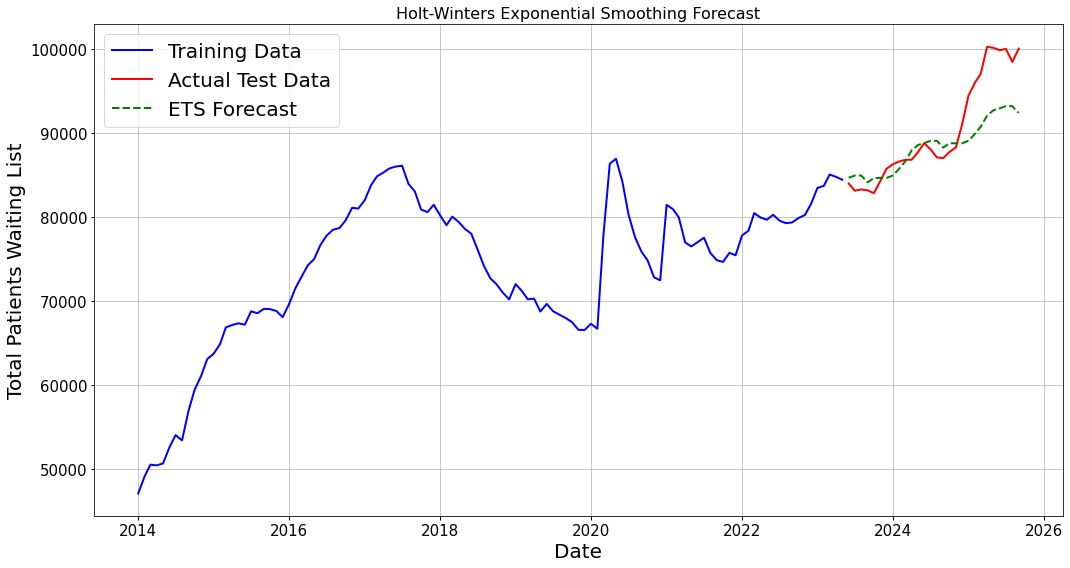

(2884.198101848764, 3954.4897470292194)

In [59]:
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
df.rename(columns={'y': 'Total Patients Waiting List'}, inplace=True)


ts = df['Total Patients Waiting List']

split_index = int(len(ts) * 0.8)
train_ts = ts[:split_index]
test_ts = ts[split_index:]

ets_model = ExponentialSmoothing(
    train_ts,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()


ets_forecast = ets_model.forecast(steps=len(test_ts))

mae = mean_absolute_error(test_ts, ets_forecast)
rmse = np.sqrt(mean_squared_error(test_ts, ets_forecast))
mape = np.mean(np.abs((test_ts - ets_forecast) / test_ts)) * 100
smape = 100 / len(test_ts) * np.sum(2 * np.abs(test_ts - ets_forecast) / (np.abs(test_ts) + np.abs(ets_forecast)))


plt.figure(figsize=(15, 8))
plt.plot(train_ts.index, train_ts.values, label='Training Data', color='blue', linewidth=2)
plt.plot(test_ts.index, test_ts.values, label='Actual Test Data', color='red', linewidth=2)
plt.plot(test_ts.index, ets_forecast.values, label='ETS Forecast', color='green', linestyle='--', linewidth=2)


plt.title('Holt-Winters Exponential Smoothing Forecast', fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Patients Waiting List', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=15, width=1.0)

plt.legend(fontsize=20)
plt.grid(True, linewidth=0.7)
plt.tight_layout()
plt.show()

mae, rmse

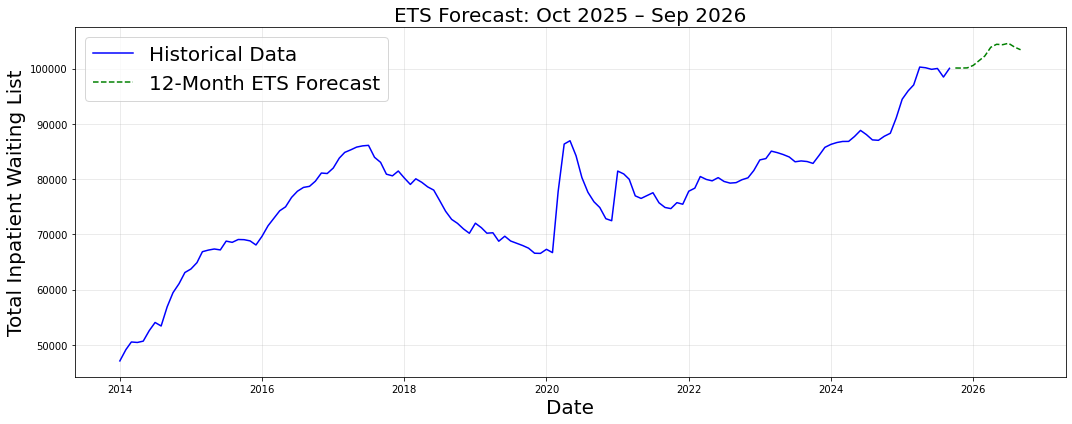

          Date  Forecast
140 2025-10-01    100104
141 2025-11-01    100093
142 2025-12-01    100123
143 2026-01-01    100577
144 2026-02-01    101467
145 2026-03-01    102257
146 2026-04-01    103855
147 2026-05-01    104394
148 2026-06-01    104319
149 2026-07-01    104576
150 2026-08-01    103893
151 2026-09-01    103406


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your full data
df = pd.read_csv("monthly_totals_2014_2025.csv")
df['ds'] = pd.to_datetime(df['ds'])

# Set as time series
df.set_index('ds', inplace=True)
ts_data = df['y']
# Fit ETS model on full data till Sept 2025
ets_model = ExponentialSmoothing(
    ts_data,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast next 12 months (Oct 2025 – Sep 2026)
forecast_periods = 12
future_forecast = ets_model.forecast(forecast_periods)

# Generate future dates
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_periods, freq='MS')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(ts_data.index, ts_data.values, label='Historical Data', color='blue')
plt.plot(future_dates, future_forecast, label='12-Month ETS Forecast', color='green', linestyle='--')
plt.title('ETS Forecast: Oct 2025 – Sep 2026',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Inpatient Waiting List',fontsize=20)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

# Optional: Forecast table
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': np.round(future_forecast, 0).astype(int)
})
print(forecast_df)